### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-17,383490,3842335,600978,496004,230792,128209,127190,125853,110796,90277,80634,98156,82619,4846,189757
2021-06-18,385137,3851539,601571,498499,230959,128220,127225,126300,110864,90374,80652,98746,82746,4846,189933
2021-06-19,386708,3859605,601741,500800,230959,128234,127253,126761,110886,90390,80652,99335,82854,4846,189933
2021-06-20,388135,3866158,601824,501825,231187,128240,127270,127206,110900,90400,80652,99934,82965,4846,190202
2021-06-21,389302,3873255,602092,502586,231244,128245,127291,127641,110940,90477,80689,100582,83101,4846,190645


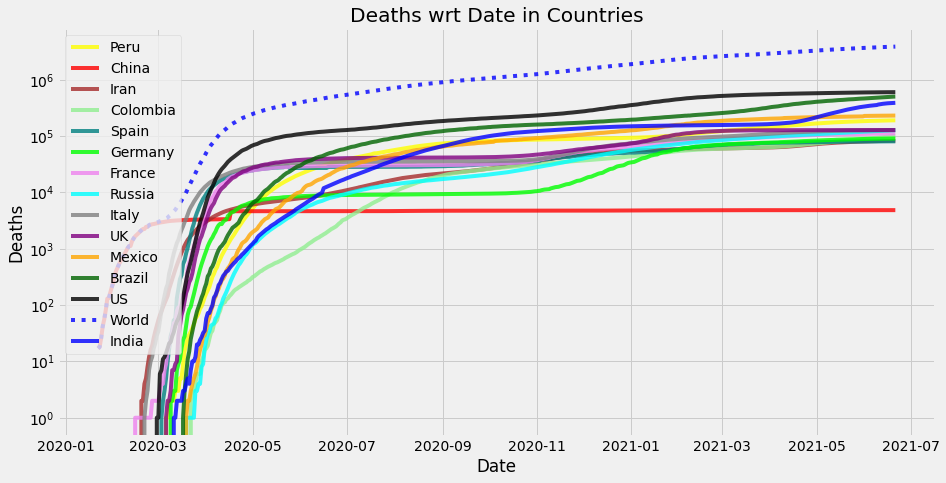

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-17,62480,392337,10399,74042,4253,10823,1323,13857,2142,901,4197,29945,10291,23,12239
2021-06-18,60753,405780,20608,98832,4098,10287,1147,17051,3187,933,4214,28790,10100,34,3463
2021-06-19,58226,347342,8520,82288,0,10076,1193,17679,2624,996,0,28734,6448,24,0
2021-06-20,53449,300190,3892,44178,5542,9077,881,17367,1816,529,0,27818,8161,18,3550
2021-06-21,42640,298251,12388,38903,1268,10468,484,17114,496,493,7209,23239,10485,28,3882


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-17,134622,445739,17974,66209,2912,5778,3061,10823,3582,3929,4609,24279,10376,23,4272
2021-06-18,129697,443075,18150,68384,2991,6078,2934,11238,3556,3729,4582,24580,10358,24,4218
2021-06-19,124932,436693,17508,69311,2792,6345,2818,11668,3493,3547,4277,24856,10097,24,3936
2021-06-20,120167,427592,16600,67635,2975,6527,2688,12048,3382,3346,3992,25054,9968,23,3911
2021-06-21,114998,418970,16319,65720,2861,6790,2541,12385,3189,3156,4206,24933,10002,24,3909


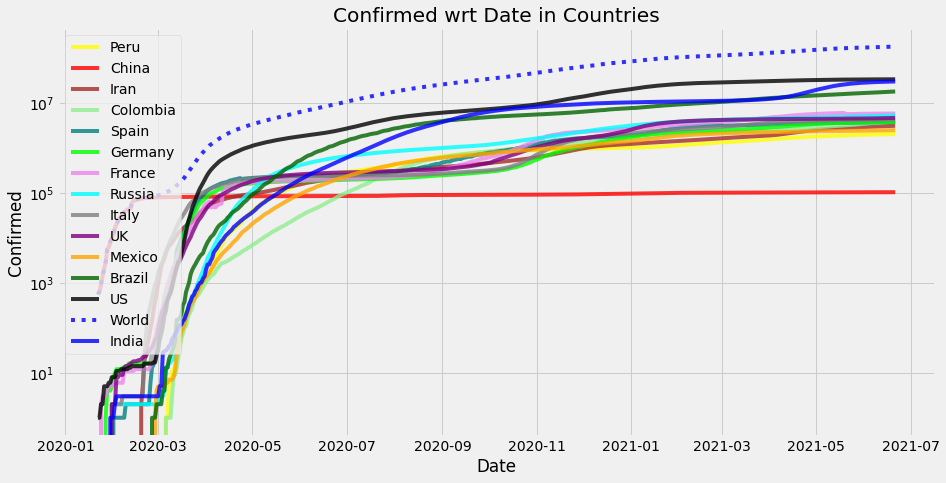

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-17,1587,9261,281,2311,168,19,37,410,56,92,19,596,139,0,496
2021-06-18,1647,9204,593,2495,167,11,35,447,68,97,18,590,127,0,176
2021-06-19,1571,8066,170,2301,0,14,28,461,22,16,0,589,108,0,0
2021-06-20,1427,6553,83,1025,228,6,17,445,14,10,0,599,111,0,269
2021-06-21,1167,7097,268,761,57,5,21,435,40,77,37,648,136,0,443


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-17,2992.43,10262.86,354.32,2011.11,242.28,10.05,63.25,378.53,65.23,98.33,35.96,563.30,148.31,0.0,339.48
2021-06-18,2824.25,10130.50,384.15,2071.60,232.87,10.17,59.72,387.09,65.58,98.17,33.71,566.64,145.65,0.0,319.05
2021-06-19,2667.59,9872.44,357.38,2100.27,203.76,10.65,55.75,396.33,60.13,87.89,29.50,569.43,140.94,0.0,279.17
2021-06-20,2512.52,9457.51,323.09,1965.86,206.79,10.07,50.91,402.41,54.37,78.16,25.81,573.13,137.20,0.0,277.90
2021-06-21,2344.33,9162.44,316.20,1815.25,188.07,9.43,47.17,406.49,52.57,78.01,27.21,582.49,137.05,0.0,298.53


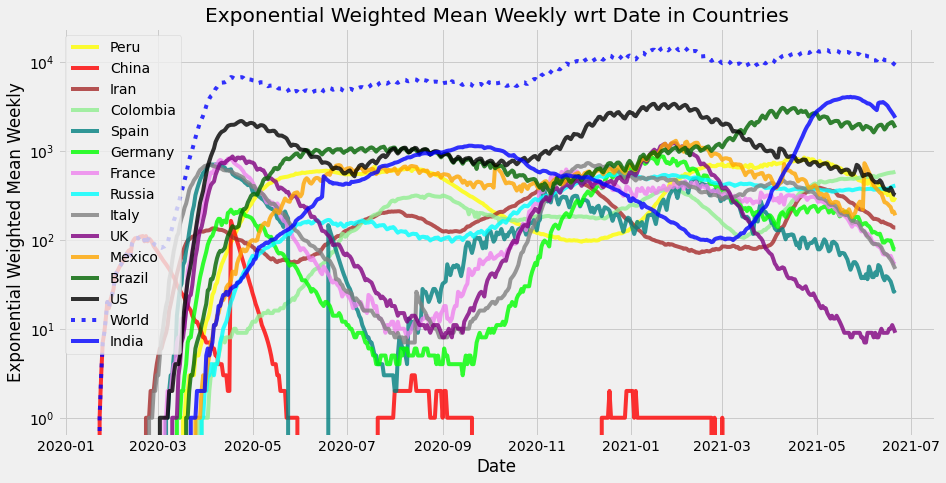

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

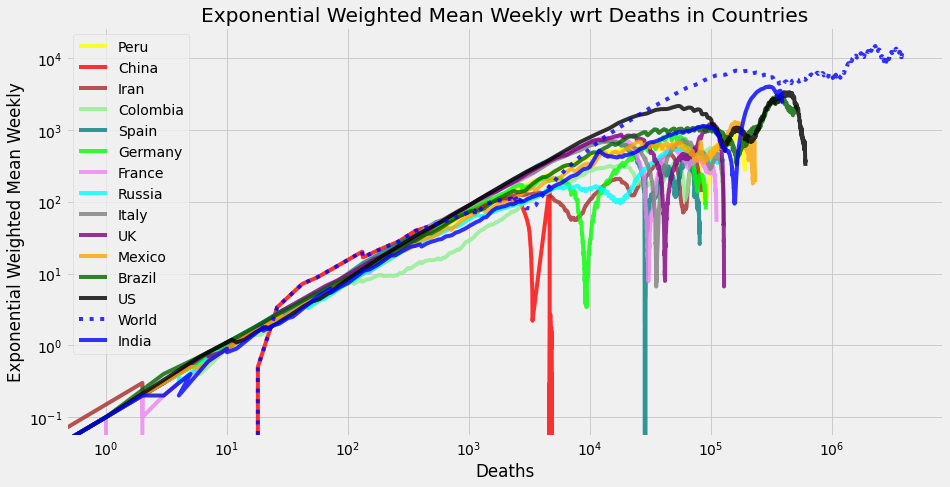

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

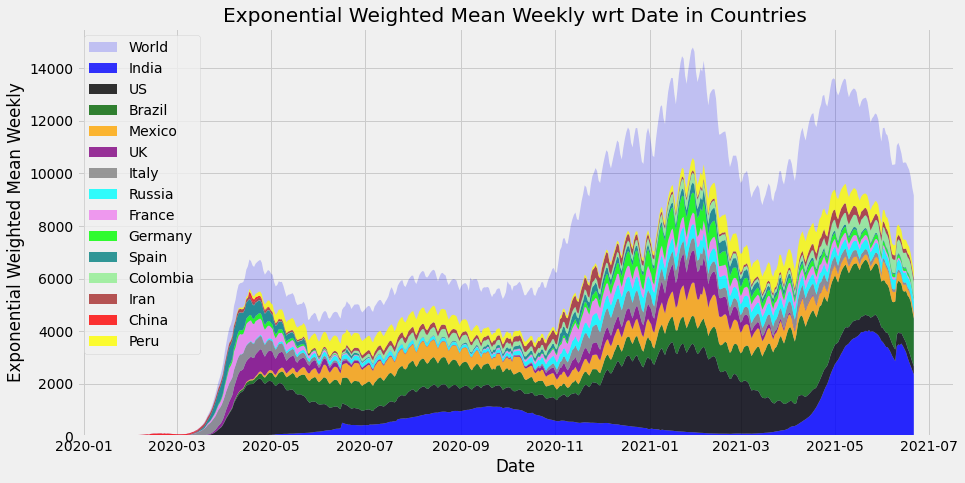

In [20]:
stackplotter(AVG, name)

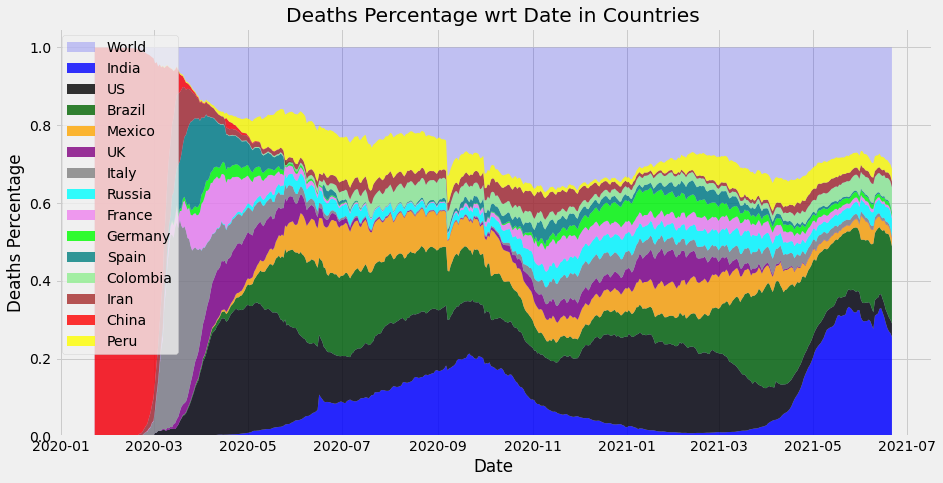

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

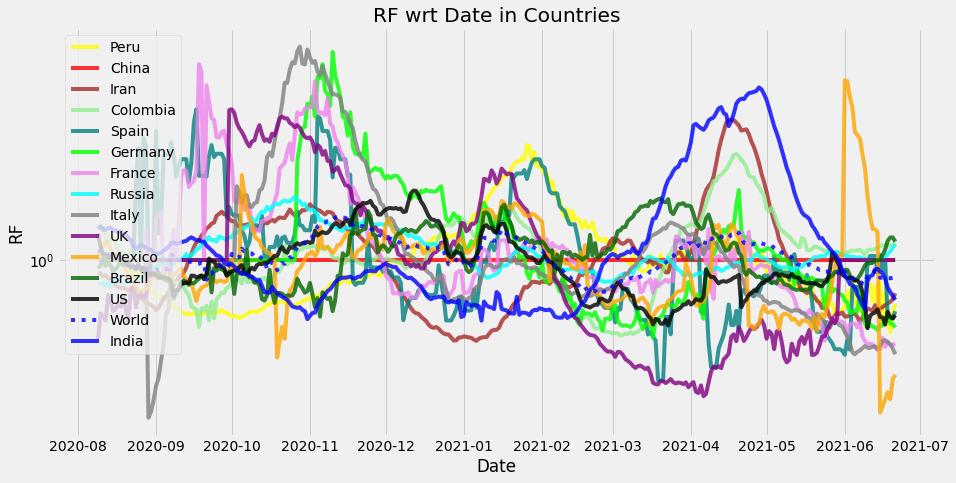

In [23]:
plotter(Reproductivity[200:], 'RF')

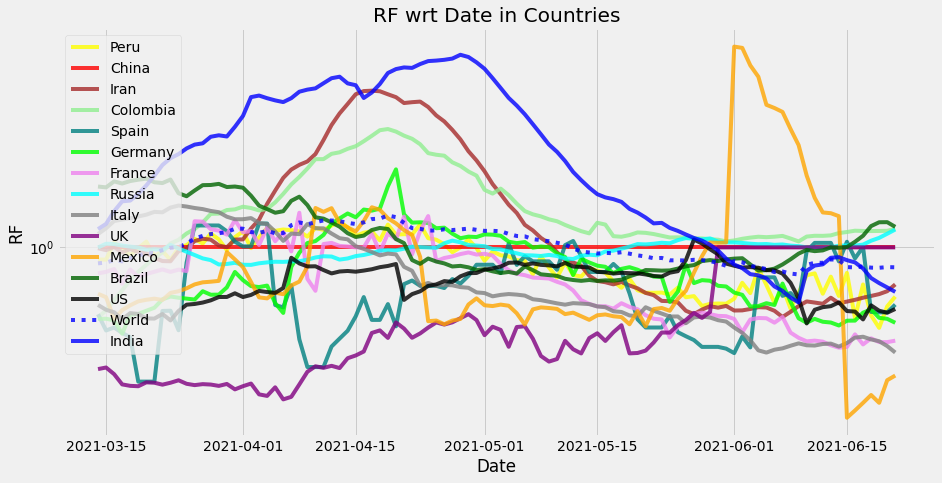

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

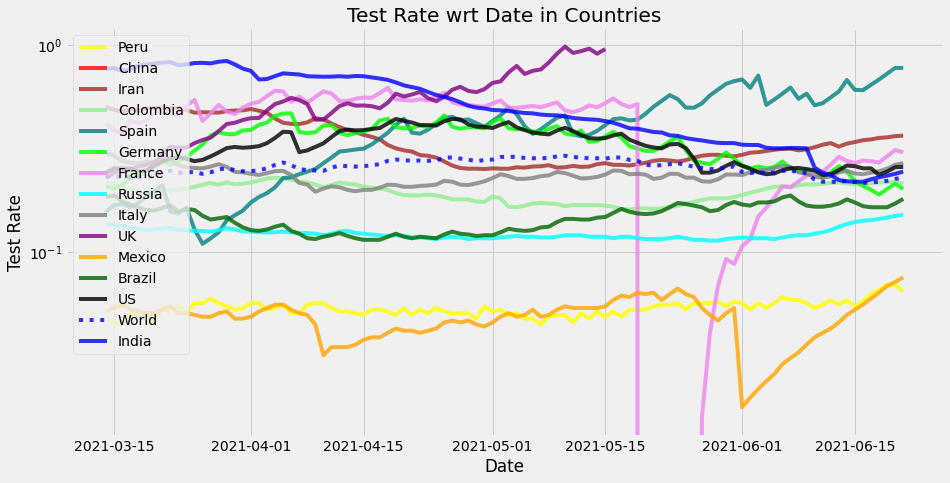

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

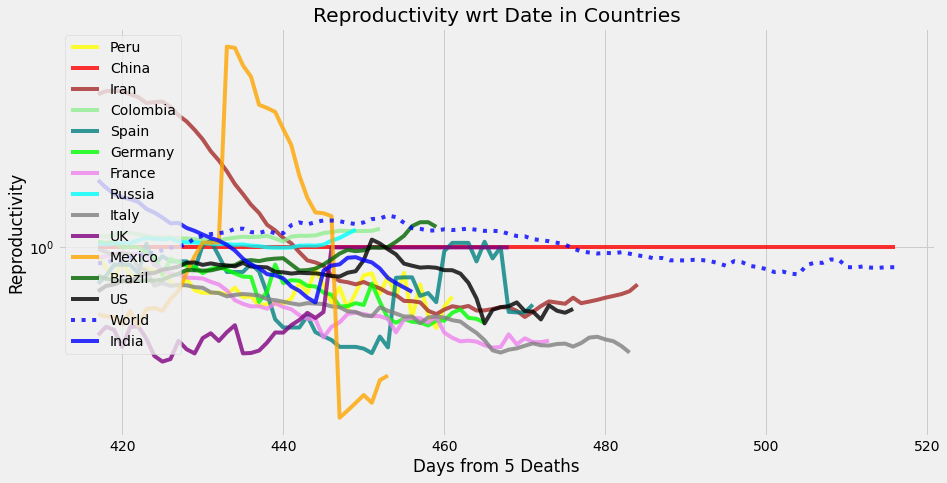

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

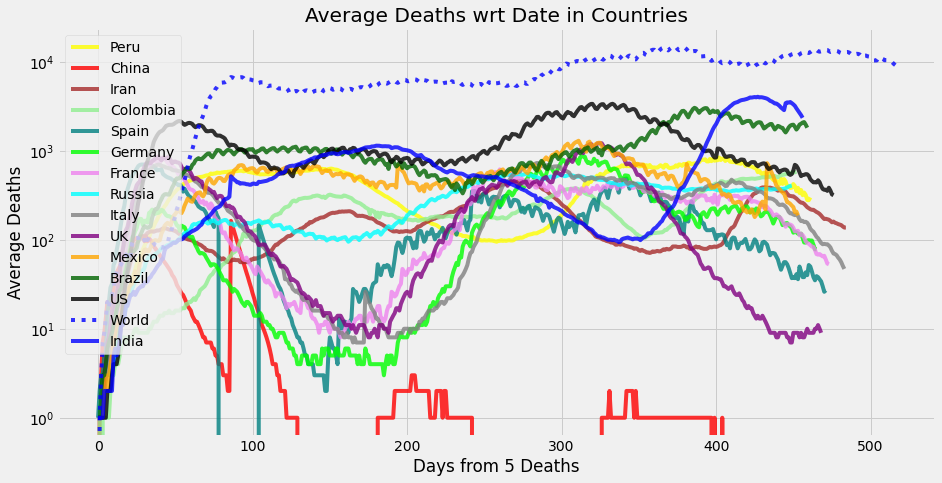

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

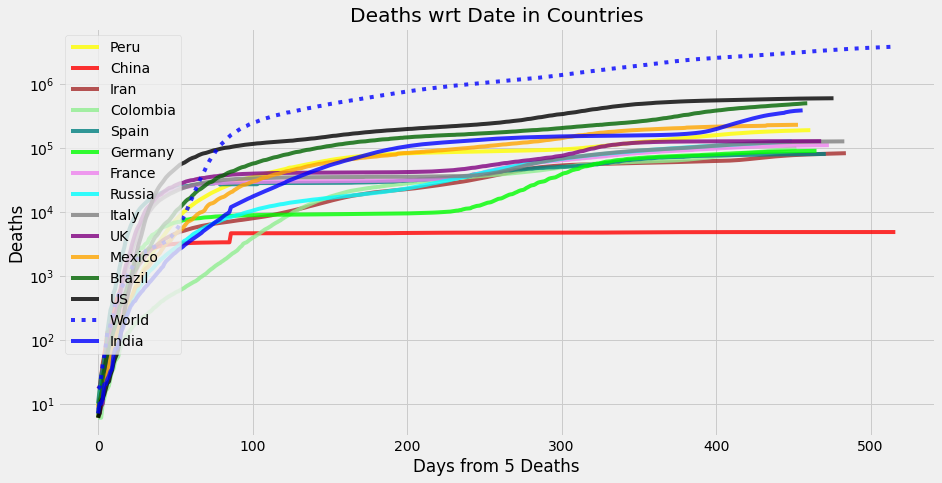

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3873255,7097,8723.43,9162.44,0.8875,178786160,0.229,418970,774.65
US,602092,268,295.86,316.20,0.6911,33554275,0.258,16319,120.42
Brazil,502586,761,2051.14,1815.25,1.1313,17966831,0.181,65720,100.52
India,389302,1167,1753.00,2344.33,0.7659,29977861,0.245,114998,77.86
Mexico,231244,57,151.00,188.07,0.4635,2478551,0.076,2861,46.25
Peru,190645,443,276.71,298.53,0.7443,2030611,0.065,3909,38.13
UK,128245,5,10.57,9.43,1.0000,4656536,NaN,6790,25.65
Russia,127641,435,422.86,406.49,1.1132,5272328,0.152,12385,25.53
Italy,127291,21,36.14,47.17,0.5321,4253460,0.269,2541,25.46


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3873255,7097,8723.43,9162.44,0.8875,178786160,0.229,418970,774.65
Brazil,502586,761,2051.14,1815.25,1.1313,17966831,0.181,65720,100.52
India,389302,1167,1753.00,2344.33,0.7659,29977861,0.245,114998,77.86
Colombia,100582,648,602.29,582.49,1.1183,3968405,0.214,24933,20.12
Argentina,89490,447,494.43,503.24,0.9605,4277395,0.226,22779,17.90
Russia,127641,435,422.86,406.49,1.1132,5272328,0.152,12385,25.53
US,602092,268,295.86,316.20,0.6911,33554275,0.258,16319,120.42
Peru,190645,443,276.71,298.53,0.7443,2030611,0.065,3909,38.13
Indonesia,54956,294,262.86,238.65,1.4055,2004445,0.184,8777,10.99


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3873255


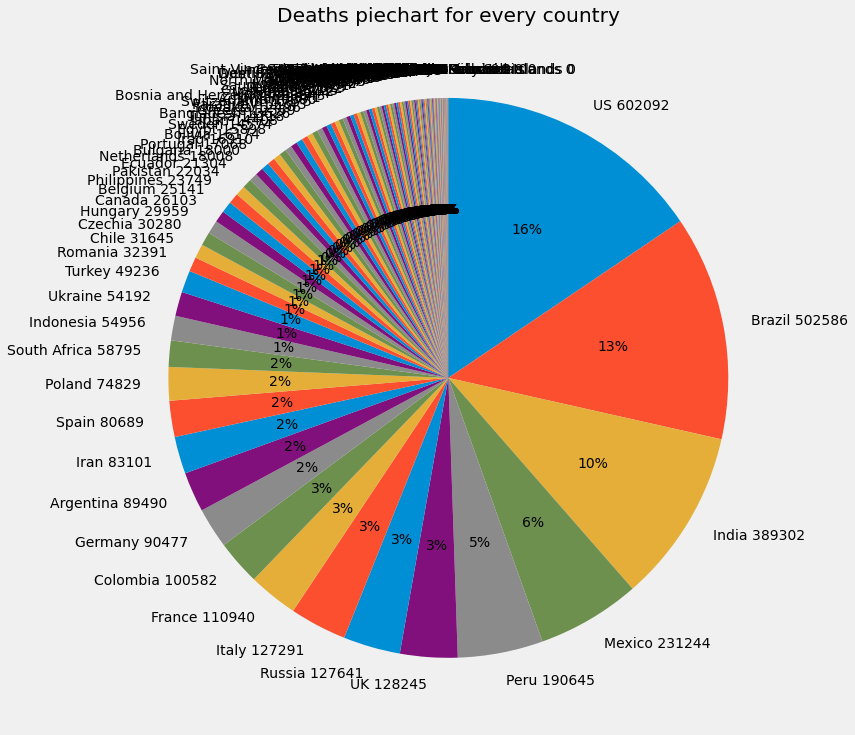

In [35]:
piechart('Deaths')

World total:  8723


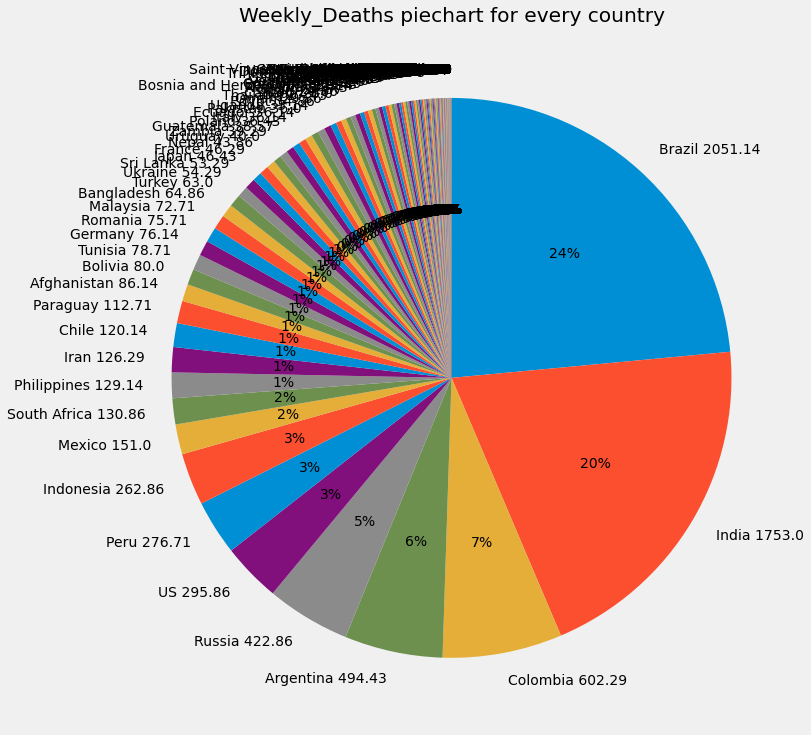

In [36]:
piechart('Weekly_Deaths')

World total:  7097


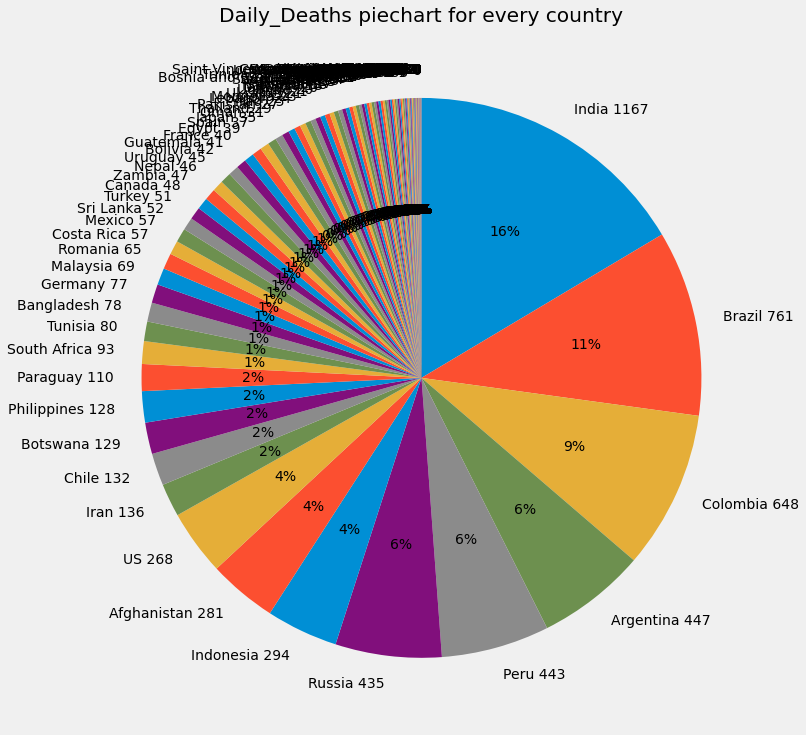

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-06-22


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

774651000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 7d24d81] `date` update
 1 file changed, 10 insertions(+), 10 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   2acf277..7d24d81  master -> master
